In [1]:
from io import open
import  glob #allows to open all the path names specific to the regex(.txt)
import os
import zipfile


In [7]:
print(glob.glob(r'C:\Users\Computer\Music\data\names\*.txt'))

['C:\\Users\\Computer\\Music\\data\\names\\Arabic.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Chinese.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Czech.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Dutch.txt', 'C:\\Users\\Computer\\Music\\data\\names\\English.txt', 'C:\\Users\\Computer\\Music\\data\\names\\French.txt', 'C:\\Users\\Computer\\Music\\data\\names\\German.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Greek.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Irish.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Italian.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Japanese.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Korean.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Polish.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Portuguese.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Russian.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Scottish.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Spanish.txt', 'C:\\Users\\Computer\\Music\\data\\names\\Vietnamese.tx

In [8]:
import unicodedata
import string

all_letters = string.ascii_letters + " .,;"
n_letters = len(all_letters)

all_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .,;'

In [9]:
n_letters

56

In [13]:
#using one-hot vector with 0-57 element long (1 - respect to , 0- other encoding to convert text to machinene readable data

language_names = {}
all_languages = []


In [14]:
print(unicodeToAscii('DARSHAN'))

DARSHAN


In [15]:
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

In [16]:
def findFiles(path):
    return glob.glob(path)

In [17]:
total_names = 0

#to process the each and every file one by one

for filename in findFiles('C:/Users/Computer/Music/data/names/*.txt'):
    language = os.path.splitext(os.path.basename(filename)) [0]
    all_languages.append(language)
    #strip any trailing and ;eading zeros respectively
    read_names = open(filename, encoding='utf-8').read().strip().split('\n')
    names = [unicodeToAscii(line) for line in read_names]
    language_names[language] = names
    total_names += len(names)

In [18]:
all_languages

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [19]:
n_languages = len(all_languages)
n_languages

18

In [20]:
total_names

20074

In [21]:
print(language_names['Czech'][:5])

['Abl', 'Adsit', 'Ajdrna', 'Alt', 'Antonowitsch']


In [22]:
import torch
tensor = torch.zeros(1,n_letters)
print(tensor[0][all_letters.find('D')])
print(tensor)


tensor(0.)
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])


In [23]:
def letterToTensor(letter):
    tensor= torch.zeros(1,n_letters)
    tensor[0][all_letters.find(letter)] = 1
    return tensor

In [24]:
#One_hot_encoding of the dataset
letterToTensor('D')

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [25]:
letterToTensor('D')

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])

In [26]:
#whole name will be encoded into one-hot tensor respectively
def nameToTensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)
    
    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1
        
    return tensor

In [27]:
check_size = nameToTensor('DARSHAN')

In [28]:
check_size.size() #there are 7-character, 1-RNN expects, 56-totalascicharacters

torch.Size([7, 1, 56])

In [29]:
check_size

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

In [30]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        #'self' instance attributes
        self.hidden_size = hidden_size
        #i2h = input-to-hidden(fully connected Linear), gets the next hidden state from the current input and previous hidden state
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        #i2o input to output state (Linear fully connected)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        #activation function used to normalize and classify the data
        self.softmax = nn.LogSoftmax(dim=1)
        
    
#current input, hidden state
    def forward(self, input, hidden):
        #first neural network layer
        combined = torch.cat((input, hidden),1)
        # second neural network layer
        hidden = self.i2h(combined)
        # third neural network layer along with the softmax activation function
        output = self.i2o(combined)
        # softmax activation function
        output = self.softmax(output)
        
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [31]:
n_hidden = 256

rnn = RNN(n_letters, n_hidden, n_languages)

In [32]:
inp = letterToTensor('A')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(inp, hidden)

print('output_size =', output.size())
print('next_hidden_size =', next_hidden.size())

output_size = torch.Size([1, 18])
next_hidden_size = torch.Size([1, 256])


In [33]:
inp = nameToTensor('Charron')

hidden = torch.zeros(1,n_hidden)

output, next_hidden = rnn(inp[0], hidden)

In [34]:
print(output)

tensor([[-2.8593, -2.9201, -2.9523, -2.9407, -2.9241, -2.8340, -2.8081, -2.9024,
         -2.8781, -2.9454, -2.8667, -2.9015, -2.8642, -2.8811, -2.9296, -2.8271,
         -2.8865, -2.9208]], grad_fn=<LogSoftmaxBackward>)


In [35]:
def languageFromOutput(output):
    _, top_i = output.topk(1)
    language_i = top_i[0].item()
    return all_languages[language_i], language_i

In [36]:
print(languageFromOutput(output))

('German', 6)


In [37]:
#random training of the data set
import random

def randomTrainingExample():
    random_language_index = random.randint(0,n_languages-1)
    language = all_languages[random_language_index]
    random_language_names = language_names[language]
    name = random_language_names[random.randint(0,len(random_language_names)-1)]
    language_tensor = torch.tensor([all_languages.index(language)], dtype= torch.long)
    name_tensor = nameToTensor(name)
    
    return language, name, language_tensor, name_tensor

In [38]:
criterion = nn.NLLLoss()
learning_rate = 0.005

In [39]:
for i in range(10):
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    print('language=', language, ',name=',name)

language= English ,name= Titterington
language= Vietnamese ,name= Bui
language= Polish ,name= Andrysiak
language= Portuguese ,name= Gaspar
language= Japanese ,name= Jo
language= Russian ,name= Jukhma
language= Czech ,name= Chromy
language= Dutch ,name= Koole
language= Polish ,name= Winogrodzki
language= Russian ,name= Valmasov


In [40]:
#Building the train model

def train(langauge_tensor, name_tensor):
    #hidden state is set to all zero
    hidden = rnn.initHidden()
    #SGD starting the optimization by considering all the initial value to zero
    rnn.zero_grad()
    
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)
     
    loss = criterion(output, language_tensor)
    loss.backward()
    
    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)
    
    return output, loss.item()
    

In [41]:
n_iters = 200000

current_loss = 0
all_losses = []

In [42]:
for epoch in range(1, n_iters+1):
    
    language, name, language_tensor, name_tensor = randomTrainingExample()
    
    output,loss = train(language_tensor, name_tensor)
    current_loss += loss
    
    if epoch % 5000 == 0:
        guess, guess_i = languageFromOutput(output)
        correct = 'correct' if guess == language else 'wrong (%s)' % language
        
        print('%d %d%% %.4f %s/ %s%s' % (epoch,
                                        epoch/ n_iters * 100,
                                        loss,
                                        name,
                                        guess,
                                        correct))
    if epoch % 1000 == 0:
        all_losses.append(current_loss/1000)
        current_loss = 0

5000 2% 2.5184 Vuong/ Arabicwrong (Vietnamese)
10000 5% 1.8794 Zhang/ Vietnamesewrong (Chinese)
15000 7% 2.9163 Lapointe/ Russianwrong (French)
20000 10% 2.1710 Sokal/ Arabicwrong (Polish)
25000 12% 0.4939 Dinh/ Vietnamesecorrect
30000 15% 1.0880 Rotolo/ Italiancorrect
35000 17% 2.4980 Sponer/ Germanwrong (Czech)
40000 20% 0.2149 Vyrubov/ Russiancorrect
45000 22% 1.1697 Acker/ Germancorrect
50000 25% 0.9263 Ran/ Chinesecorrect
55000 27% 0.0657 Tsukahara/ Japanesecorrect
60000 30% 0.9058 Sotiris/ Greekcorrect
65000 32% 0.0769 Akimoto/ Japanesecorrect
70000 35% 0.2852 Odaka/ Japanesecorrect
75000 37% 0.4431 Paszek/ Polishcorrect
80000 40% 0.1289 Gwang / Koreancorrect
85000 42% 1.3148 Ramirez/ Portuguesewrong (Spanish)
90000 45% 0.2213 Isobe/ Japanesecorrect
95000 47% 2.2746 Rousses/ Portuguesewrong (Greek)
100000 50% 0.2811 Watson/ Scottishcorrect
105000 52% 0.2348 Wechsler/ Germancorrect
110000 55% 0.2484 Thai/ Vietnamesecorrect
115000 57% 0.9911 Reynold/ Irishcorrect
120000 60% 0.4285 

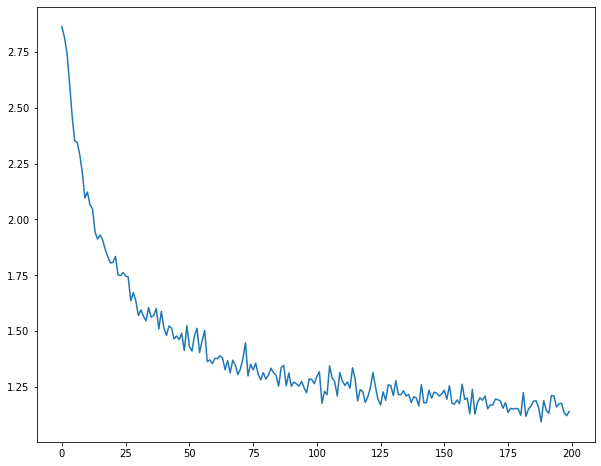

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(all_losses)
plt.show()

In [46]:
n_predictions = 3

In [47]:
input_name = 'Amaya'


In [55]:
#we need to turn off the gradient for the test data

with torch.no_grad():
    name_tensor = nameToTensor(input_name)
    
    hidden = rnn.initHidden()
    for i in range(name_tensor.size()[0]):
        output, hidden = rnn(name_tensor[i], hidden)
    
    #top 3 langusge will printed
    topv, topi = output.topk(n_predictions,1, True)
    check = []
    language = []
    
    for i in range(n_predictions):
        value = topv[0][i].item()
        check.append(value)
        language_index = topi[0][i].item()
        language.append(language_index)
        
        print('(%.2f) %s' % (value, all_languages[language_index]))

(-0.13) Japanese
(-2.27) Arabic
(-4.86) Portuguese
